In [122]:
pip install scikit-XCS

In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

data = pd.read_csv ('/content/winequality-white.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality num,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Bad
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Bad
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Bad
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Good


In [124]:
classLabel="quality num"
data2 = data.drop(classLabel, axis = 1)

In [125]:
ClassLabel="quality"
dataFeatures = data2.drop(ClassLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r-1]

In [126]:
Features = data2.drop(ClassLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


In [127]:
dataActions = data[ClassLabel].values
dataActions= dataActions[:r-1]

In [128]:
dataActions

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Good'], dtype=object)

In [129]:
dataFeatures_train, dataFeatures_test, dataActions_train, dataActions_test = train_test_split(dataFeatures, dataActions, stratify=dataActions, random_state=1)

In [130]:
DataActions_train=LabelBinarizer().fit_transform(dataActions_train)
DataActions_test=LabelBinarizer().fit_transform(dataActions_test)  

In [131]:
l=len(DataActions_train)
Y=DataActions_train.reshape(l,)

In [132]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 10000,nu = 10,alpha=0.9)
trainedModel = model.fit(dataFeatures_train,Y)

In [133]:
trainedModel.export_iteration_tracking_data("iterationData_white_wine_quality_XCS.csv")

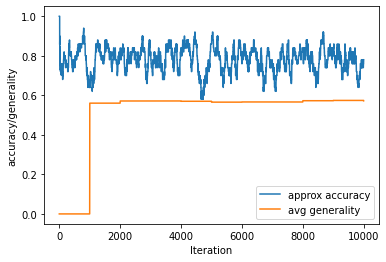

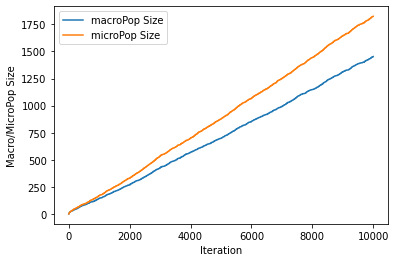

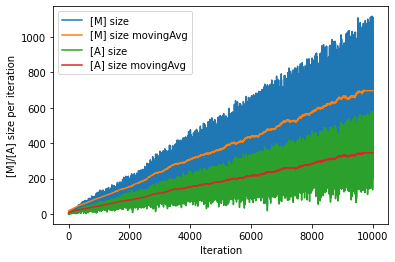

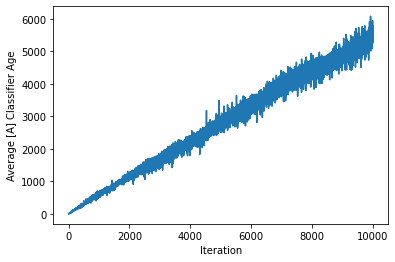

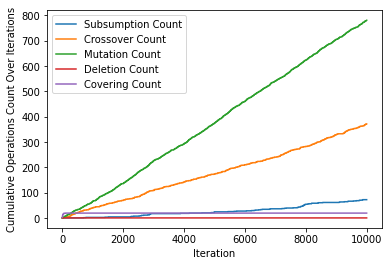

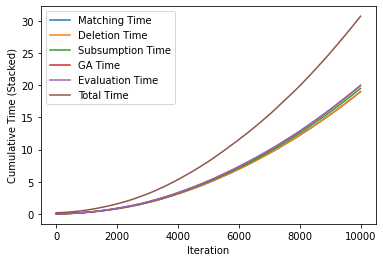

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_white_wine_quality_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [135]:
trainedModel.export_final_rule_population("RulePopulationWineQualiyWhiteXCS.csv",Features,ClassLabel)

populationData2 = pd.read_csv("RulePopulationWineQualiyWhiteXCS.csv")
display(populationData2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"4.98,11.219999999999999",#,#,#,"-0.008235,0.09623499999999999",#,#,"0.97694225,1.01065775","2.9693,3.4707000000000003",#,...,220.643972,3.290954e-14,1,464.127992,9995,0,0.363636,NaN,2290,8764
1,#,#,#,"-12.844000000000001,15.844000000000001","-0.06720999999999999,0.15521",#,#,"0.9766829,1.0109171",#,#,...,65.656947,6.045548e-09,1,373.518315,9988,0,0.363636,NaN,6145,8307
2,#,"-0.11109999999999998,0.5111","0.06930000000000003,0.5507","-7.648,23.648",#,"-61.09,119.09","158.14,267.86",#,"3.08925,3.47075","0.25549999999999995,0.8845",...,62.332165,1.016530e-08,1,571.603345,9976,1,0.636364,NaN,535,1990
3,#,"-0.056599999999999984,0.6166",#,#,"-0.07594999999999999,0.15995","-39.64,97.64",#,"0.9897008,1.0062992",#,"0.22525,0.45475000000000004",...,53.262355,4.898227e-08,1,489.847325,9932,2,0.545455,NaN,844,3314
4,"5.588,8.812",#,"0.06420000000000003,0.4958",#,#,#,"97.03,210.97","0.9857051,1.0137149","2.7874,3.0926",#,...,65.497898,6.193967e-09,1,471.762297,9703,3,0.545455,NaN,595,793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,#,#,#,"4.263999999999999,67.67804738189808",#,"-47.66,96.07",#,"0.98935755,1.00336245","2.72845,3.3715499999999996","0.45099999999999996,0.755",...,158.720000,8.870048e-13,1,547.939200,9988,9967,0.545455,NaN,8,12
1449,"3.8640000000000008,8.431999999999999",#,#,"4.263999999999999,67.67804738189808",#,#,"139.82,264.85","0.9620143453419097,1.0155919",#,"0.17174999999999999,0.714",...,0.000000,1.000000e+00,1,633.000000,9988,9988,0.545455,NaN,3,5
1450,"3.8640000000000008,10.936",#,#,#,#,#,#,"0.97754615,1.01437385","2.72845,3.849843553408091",#,...,0.000000,1.000000e+00,1,633.000000,9988,9988,0.363636,NaN,3,5
1451,#,"-0.11109999999999998,0.5885","-0.061399999999999955,0.9014","-5.854000000000001,13.054","-0.07594999999999999,0.20873284897349653","-26.38000000000001,97.64","55.59,186.41",#,"3.03375,3.4362000000000004",#,...,0.000000,1.000000e+00,1,294.000000,9995,9995,0.636364,NaN,1,1


In [136]:
trainedModel.export_final_rule_population_DCAL("RulePopulationWineQualiyWhiteXCS2.csv",Features,ClassLabel)

populationData3 = pd.read_csv("RulePopulationWineQualiyWhiteXCS2.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,quality,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[4.98,11.219999999999999], [-0.008235,0.096234...","fixed acidity, chlorides, density, pH",1,1.184347e-04,180.411347,220.643972,3.290954e-14,1,464.127992,9995,0,0.363636,NaN,2290,8764
1,"[-12.844000000000001,15.844000000000001], [-0....","residual sugar, chlorides, density, alcohol",0,8.463983e-05,979.870538,65.656947,6.045548e-09,1,373.518315,9988,0,0.363636,NaN,6145,8307
2,"[-0.11109999999999998,0.5111], [0.069300000000...","volatile acidity, citric acid, residual sugar,...",1,6.325924e-05,18.020853,62.332165,1.016530e-08,1,571.603345,9976,1,0.636364,NaN,535,1990
3,"[-0.056599999999999984,0.6166], [-0.0759499999...","volatile acidity, chlorides, free sulfur dioxi...",1,4.344896e-06,14.571354,53.262355,4.898227e-08,1,489.847325,9932,2,0.545455,NaN,844,3314
4,"[5.588,8.812], [0.06420000000000003,0.4958], [...","fixed acidity, citric acid, total sulfur dioxi...",0,1.785818e-07,982.977861,65.497898,6.193967e-09,1,471.762297,9703,3,0.545455,NaN,595,793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,"[4.263999999999999,67.67804738189808], [-47.66...","residual sugar, free sulfur dioxide, density, ...",0,7.306107e-03,897.600000,158.720000,8.870048e-13,1,547.939200,9988,9967,0.545455,NaN,8,12
1449,"[3.8640000000000008,8.431999999999999], [4.263...","fixed acidity, residual sugar, total sulfur di...",0,3.761714e-02,1000.000000,0.000000,1.000000e+00,1,633.000000,9988,9988,0.545455,NaN,3,5
1450,"[3.8640000000000008,10.936], [0.97754615,1.014...","fixed acidity, density, pH, alcohol",0,3.761714e-02,1000.000000,0.000000,1.000000e+00,1,633.000000,9988,9988,0.363636,NaN,3,5
1451,"[-0.11109999999999998,0.5885], [-0.06139999999...","volatile acidity, citric acid, residual sugar,...",0,1.918385e-01,1000.000000,0.000000,1.000000e+00,1,294.000000,9995,9995,0.636364,NaN,1,1


In [137]:
l1=len(DataActions_test)
Y_test=DataActions_test.reshape(l1,)

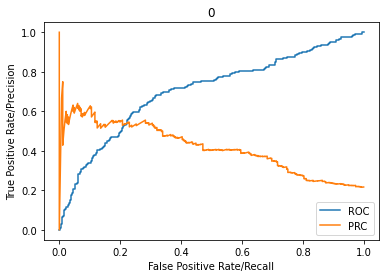

PRC AUC:0.4139943522596132
ROC AUC:0.7019693396226415


<Figure size 432x288 with 0 Axes>

In [138]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_test, probs[:,1])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test, probs[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()
plt.savefig("wine quality white LCS.png")

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [139]:
probs

array([[0.9325467 , 0.0674533 ],
       [0.97521455, 0.02478545],
       [0.91610695, 0.08389305],
       ...,
       [0.87010542, 0.12989458],
       [0.94416002, 0.05583998],
       [0.95669236, 0.04330764]])

In [140]:
Y_test

array([0, 0, 0, ..., 0, 1, 0])

In [141]:
fpr1

array([0.        , 0.00104167, 0.00104167, 0.00104167, 0.00416667,
       0.00416667, 0.00520833, 0.00520833, 0.00625   , 0.00625   ,
       0.00729167, 0.00729167, 0.00833333, 0.00833333, 0.009375  ,
       0.009375  , 0.01041667, 0.01041667, 0.01145833, 0.01145833,
       0.0125    , 0.0125    , 0.01458333, 0.01458333, 0.015625  ,
       0.015625  , 0.01666667, 0.01666667, 0.01770833, 0.01770833,
       0.021875  , 0.021875  , 0.021875  , 0.02708333, 0.02708333,
       0.028125  , 0.028125  , 0.02916667, 0.03125   , 0.03229167,
       0.03229167, 0.03541667, 0.03541667, 0.03645833, 0.03645833,
       0.03854167, 0.03854167, 0.03854167, 0.03854167, 0.03958333,
       0.03958333, 0.04166667, 0.04166667, 0.04270833, 0.04270833,
       0.04375   , 0.04375   , 0.04479167, 0.04479167, 0.04583333,
       0.04583333, 0.05104167, 0.05104167, 0.05208333, 0.05208333,
       0.053125  , 0.053125  , 0.05833333, 0.05833333, 0.06041667,
       0.06041667, 0.0625    , 0.0625    , 0.06666667, 0.06666